In [1]:
# Importamos las librerías necesarias para el modelado y la evaluación del modelo
import pandas as pd             # Para la manipulación de dataframes
import numpy as np              # Para cálculos numéricos
import matplotlib.pyplot as plt # Para visualizar resultados
import seaborn as sns           # Para gráficos estadísticos

# Importamos funciones de scikit-learn para dividir datos, entrenar y evaluar modelos
from sklearn.model_selection import train_test_split  # Para separar datos en entrenamiento y prueba
from sklearn.tree import DecisionTreeClassifier      # Modelo de Árbol de Decisión para clasificación
from sklearn.metrics import classification_report, confusion_matrix  # Métricas para evaluar el modelo
import joblib  # Para guardar el modelo entrenado

# Configuración de visualización en línea para matplotlib
%matplotlib inline


In [2]:
# Definimos la ruta del dataset procesado
processed_data_path = r"D:\gzo\myProjects\dataAnalyst\projects\predictive_maintenance_01\data\processed\processed_machine_data.csv"

# Cargamos el dataset procesado en un DataFrame
df = pd.read_csv(processed_data_path)

# Mostramos las primeras filas para confirmar la carga
df.head()



,machine_id,operating_hours,temperature,vibration,pressure,humidity,failure_type,maintenance_required
0,-1.731878,0.826546,-0.156917,1.461389,1.377266,0.517589,No Failure,-0.424359
1,-1.731531,-1.421065,0.647928,1.078379,-0.970373,0.776294,Overheat,2.356497
2,-1.731185,0.167340,-0.482063,0.835104,1.494533,-0.053476,No Failure,-0.424359
3,-1.730838,0.097563,0.590378,-0.582986,-1.388413,-0.160527,No Failure,-0.424359
4,-1.730492,0.287961,-1.594302,-1.516436,1.142205,-1.012421,No Failure,-0.424359


In [3]:
# Separamos las variables predictoras (features) y la variable objetivo (target)
# Suponiendo que la variable objetivo se llama 'maintenance_required' y es binaria (0: no requiere, 1: requiere)

from sklearn.preprocessing import LabelEncoder  # Importar codificador

X = df.drop(columns=["maintenance_required"])  # Variables predictoras
categorical_cols = X.select_dtypes(include=['object']).columns  # Identificar columnas categóricas

# Aplicar Label Encoding a columnas categóricas
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])  # Convertir categorías a números

# Verificar los cambios
print("✅ Variables categóricas convertidas a numéricas")
print(X.head())

# Aseguramos que la variable objetivo solo contenga 0 y 1
y = df["maintenance_required"]

# Verificamos si hay valores incorrectos
print("📊 Valores únicos en y antes de la corrección:", y.unique())

# Si hay valores distintos de 0 y 1, corregimos
y = y.map(lambda x: 1 if x > 0 else 0).astype(int)  # Convierte cualquier valor mayor que 0 en 1

# Verificamos después de la corrección
print("✅ Valores únicos en y después de la corrección:", y.unique())

# Mostrar los tipos de datos de cada columna en X
print(X.dtypes)

# Dividimos los datos en conjuntos de entrenamiento (70%) y prueba (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Mostramos las dimensiones de cada conjunto
print("Dimensiones del conjunto de entrenamiento:", X_train.shape)
print("Dimensiones del conjunto de prueba:", X_test.shape)

✅ Variables categóricas convertidas a numéricas
   machine_id  operating_hours  temperature  vibration  pressure  humidity  \
0   -1.731878         0.826546    -0.156917   1.461389  1.377266  0.517589   
1   -1.731531        -1.421065     0.647928   1.078379 -0.970373  0.776294   
2   -1.731185         0.167340    -0.482063   0.835104  1.494533 -0.053476   
3   -1.730838         0.097563     0.590378  -0.582986 -1.388413 -0.160527   
4   -1.730492         0.287961    -1.594302  -1.516436  1.142205 -1.012421   

   failure_type  
0             1  
1             2  
2             1  
3             1  
4             1  
📊 Valores únicos en y antes de la corrección: [-0.42435863  2.35649739]
✅ Valores únicos en y después de la corrección: [0 1]
machine_id         float64
operating_hours    float64
temperature        float64
vibration          float64
pressure           float64
humidity           float64
failure_type         int64
dtype: object
Dimensiones del conjunto de entrenamiento: (70

In [4]:
# Creamos una instancia del modelo de Árbol de Decisión
model = DecisionTreeClassifier(random_state=42)  # Semilla para reproducibilidad

# Entrenamos el modelo utilizando el conjunto de entrenamiento
model.fit(X_train, y_train)  # Ajusta el modelo a los datos de entrenamiento

# Realizamos predicciones sobre el conjunto de prueba
y_pred = model.predict(X_test)  # Predicciones sobre los datos de prueba

# Verificamos los valores únicos en y_pred
print("📊 Valores únicos en y_pred después de la corrección:", np.unique(y_pred))  # Debe mostrar solo 0 y 1


📊 Valores únicos en y_pred después de la corrección: [0 1]


🔍 Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2545
           1       1.00      1.00      1.00       455

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



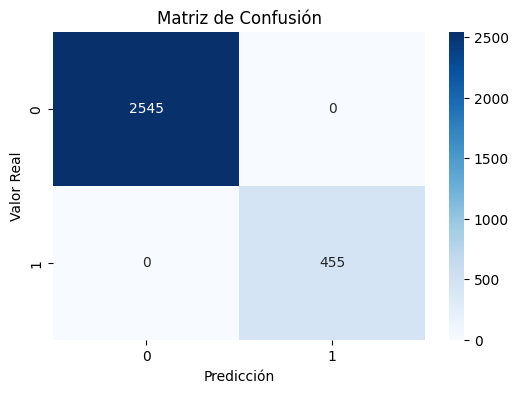

In [5]:
# Calculamos el reporte de clasificación con precisión, recall y f1-score
print("🔍 Reporte de Clasificación:")
print(classification_report(y_test, y_pred))  # Muestra las métricas de evaluación

# Calculamos la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Visualizamos la matriz de confusión con seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")  # Muestra los valores dentro de la matriz
plt.title("Matriz de Confusión")  # Título del gráfico
plt.xlabel("Predicción")  # Etiqueta del eje X
plt.ylabel("Valor Real")  # Etiqueta del eje Y
plt.show()


In [6]:
from sklearn.model_selection import GridSearchCV  # Para búsqueda de hiperparámetros

# Definir el espacio de búsqueda de hiperparámetros
param_grid = {
    "max_depth": [3, 5, 10, None],  # Profundidad máxima del árbol
    "min_samples_split": [2, 5, 10],  # Mínimo de muestras necesarias para dividir un nodo
    "min_samples_leaf": [1, 2, 4],  # Mínimo de muestras en cada hoja
    "criterion": ["gini", "entropy"]  # Función de criterio para dividir nodos
}

# Realizar búsqueda de hiperparámetros con validación cruzada
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)  # Ajustar modelo con diferentes combinaciones

# Mejor combinación de hiperparámetros encontrada
print("🌟 Mejores Hiperparámetros:", grid_search.best_params_)

# Evaluar el mejor modelo encontrado
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)

# Reporte de clasificación del mejor modelo
print("🔍 Reporte de Clasificación del Mejor Modelo:")
print(classification_report(y_test, y_pred_best))


Fitting 5 folds for each of 72 candidates, totalling 360 fits
🌟 Mejores Hiperparámetros: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
🔍 Reporte de Clasificación del Mejor Modelo:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2545
           1       1.00      1.00      1.00       455

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



In [7]:
import os
import joblib  # Para guardar el modelo entrenado

# Definimos la ruta para guardar el modelo entrenado
model_path = r"D:\gzo\myProjects\dataAnalyst\projects\predictive_maintenance_01\models\model_v1.pkl"

# Crear la carpeta de modelos si no existe
model_dir = os.path.dirname(model_path)
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print(f"📂 Carpeta creada: {model_dir}")
else:
    print(f"✅ Carpeta existente: {model_dir}")

# Guardamos (serializamos) el modelo utilizando joblib
joblib.dump(model, model_path)

print(f"✅ Modelo guardado en: {model_path}")


✅ Carpeta existente: D:\gzo\myProjects\dataAnalyst\projects\predictive_maintenance_01\models
✅ Modelo guardado en: D:\gzo\myProjects\dataAnalyst\projects\predictive_maintenance_01\models\model_v1.pkl
